In [19]:
import re
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from google.colab import files
from sklearn.model_selection import train_test_split

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Xem các file đã tải lên
import pandas as pd
import io

# Đọc các file CSV vào DataFrame
real = pd.read_csv('new_real.csv')
fake = pd.read_csv('new_fake.csv')

In [6]:
real.shape

(653, 6)

In [7]:
fake.shape

(422, 6)

In [8]:
df = pd.concat([real, fake], ignore_index=True)
df.shape

(1075, 6)

In [9]:
df = df.dropna(subset=['label'])

In [10]:
df['label'] = df['label'].astype(int)

In [11]:
df.columns

Index(['date', 'author_id', 'content', 'label', 'link', 'comment_list'], dtype='object')

In [12]:
df2 = df.drop(['link', 'comment_list', 'date', 'author_id'], axis=1)

In [13]:
df2.head()

,content,label
0,"Vụ xe bán tải cố vượt rào chắn, bị tàu hỏa tôn...",1
1,"TPHCM: Hơn 4.600 ca mắc sốt xuất huyết, nhiều ...",1
2,Nóng: Ngộ độc hàng loạt tại trụ sở công ty mẹ ...,1
3,Ngày mai: Giá xăng trong nước có thể giảm lần ...,1
4,Pin dự phòng của hành khách bốc cháy tại nhà ...,1


<Axes: xlabel='label'>

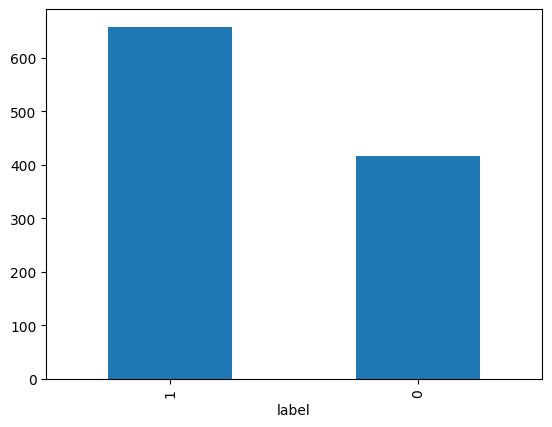

In [14]:
df2['label'].value_counts().plot.bar()

In [15]:
def clean_text(text):
    # Chuyển đổi văn bản thành chữ thường
    text = text.lower()
    # Xóa các URL
    text = re.sub(r"http\S+", "", text)
    # Xóa các ký tự không phải là chữ cái, số hoặc dấu thanh cơ bản
    text = re.sub(r"[^a-zA-Z0-9\sáàảãạăằắẳẵặâầấẩẫậèẹẻẽẽêềếểễệìíỉĩịòóỏõọôồốổỗộơờởỡợớùúủũụưừửữựứỳýỷỹỵđ]", "", text)
    # Xóa các khoảng trắng thừa
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [16]:
# Clean content
df2['content'] = df2['content'].apply(clean_text)

In [17]:
df2.head()

,content,label
0,vụ xe bán tải cố vượt rào chắn bị tàu hỏa tông...,1
1,tphcm hơn 4600 ca mắc sốt xuất huyết nhiều điể...,1
2,nóng ngộ độc hàng loạt tại trụ sở công ty mẹ t...,1
3,ngày mai giá xăng trong nước có thể giảm lần t...,1
4,pin dự phòng của hành khách bốc cháy tại nhà g...,1


<Axes: xlabel='label'>

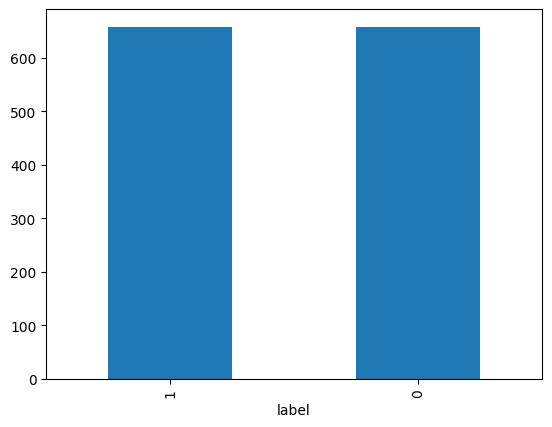

In [18]:
# Tạo bước tăng cường dữ liệu
ros = RandomOverSampler()
df2['content'] = df2['content'].astype(str)  # Đảm bảo cột nội dung là kiểu chuỗi
x_over, y_over = ros.fit_resample(df2[['content']], df2['label'])
df2 = pd.DataFrame(data=x_over, columns=['content'])
df2['label'] = y_over

# Kiểm tra phân phối nhãn
df2['label'].value_counts().plot.bar()

In [22]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_texts, val_texts, train_labels, val_labels = train_test_split(df2['content'], df2['label'], test_size=0.2)

In [23]:
train_df = pd.DataFrame({'content': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'content': val_texts, 'label': val_labels})

In [24]:
#('/content/drive/MyDrive/Colab Notebooks/Report1/dataset_0708.csv', index=False)
train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Report1/train_data.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Report1/val_data.csv', index=False)